<a href="https://colab.research.google.com/github/Khanyecebani/Pytorch-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Before we import the data,we need to transform it as we need to work in 4 dimensions by converting
#the image files to a tensor of 4 dim(# of images,height,width,color channel)

#We have to use the transform that we imported
transform = transforms.ToTensor()


In [3]:
#Set up training and test data

#Train data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform) #we use the datasets that we imported to load the MNIST dataset from that library and save it locally

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:11<00:00, 893kB/s] 


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
#Test Data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform) #we use the datasets that we imported to load the MNIST dataset from that library and save it locally

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
#We have to create a small batch size for images (10)
train_loader = DataLoader(train_data,batch_size=10,shuffle=True) #we just want to shuffle the training data
test_loader = DataLoader(test_data,batch_size=10,shuffle=True)


In [8]:
#Define our CNN model
#We will have 2 convulational layers
conv1 = nn.Conv2d(1,6,3,1) #1 image,6 filters(outputs),kernel size of 3x3,stride of 1 at a time
conv2 = nn.Conv2d(6,16,3,1) #6 outputs from the first layer become the inputs to this layer,16 filters(outputs),kernel size of 3x3,stride of 1 at a time


In [9]:
#Grab 1 MNIST record(image) by looping through our data
for i, (X_Train,y_train) in enumerate(train_data):
  break

In [10]:
X_Train.shape #1 image of size 28x28 pixels

torch.Size([1, 28, 28])

In [11]:
#We have to change our image to a 4 dimension image
x = X_Train.view(1,1,28,28) #1 batch of 1 image of 28x28

In [12]:
#Perform our first convolution
x = F.relu(conv1(x)) #Rectified Linear Unit for our activation function

In [13]:
x.shape #the layer has run and the output is a single image with 6 filters and now a 26x26
#because we did not define any padding in our CNN and some pixels will be dropped


torch.Size([1, 6, 26, 26])

In [14]:
#We now get into the pooling layer
x = F.max_pool2d(x,2,2) #kernel of 2x2 and stride of 2

In [15]:
x.shape #pixels are now 13x13 as we have a kernel of 2x2 and stride of 2


torch.Size([1, 6, 13, 13])

In [16]:
#Do our second convolutional layer
x = F.relu(conv2(x))

In [17]:
x.shape #Image is now of 11x11 since we lost 2 pixels by not setting padding



torch.Size([1, 16, 11, 11])

In [18]:
#We get into another pooling layer
x = F.max_pool2d(x,2,2)

In [19]:
x.shape #image is now of 5x5 as 11/2 = 5.5 but we have to round down because we
#have already lost some data(pixels) in the pooling

torch.Size([1, 16, 5, 5])

In [20]:
#We now have to create a model for all the images instead of just 1

In [21]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #we then need to bring our convulational networks defined before
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #We also need a fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

    #We now need a forward function to push everything forward

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) #2x2 kernal and stride 2

    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) #2x2 kernal and stride 2

    #Re-View to flatten it out
    X = X.view(-1,16*5*5) #-1 so that we can vary the batch size

    #Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)


In [22]:
#Create an Instance of the model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
#We need a Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [24]:
#Training and Testing our model

#We will see how long it takes to train our module
import time
start_time = time.time()

#Create variables to track things
epochs = 5 #how many times we will train and test our model
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#for loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1 #start our batches at 1
    y_pred = model(X_train) #get predicted values from the training set
    loss = criterion(y_pred,y_train) #how off are we? Compare the results.

    predicted = torch.max(y_pred.data, 1)[1] #add up the number of correct predictions
    batch_corr = (predicted == y_train).sum() #how many we got correct them sum up.True=1,False=0
    trn_corr+= batch_corr

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Working with Test data
  with torch.no_grad(): #no grad so we don't update our weights and biases with test data
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] #add up correct predictions
      tst_corr+= (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)




current_time = time.time()
total = current_time - start_time
print(f'Training took: {total/60} minutes!')



Epoch: 0 Batch: 600 Loss: 0.16236107051372528
Epoch: 0 Batch: 1200 Loss: 0.15510495007038116
Epoch: 0 Batch: 1800 Loss: 0.4651116728782654
Epoch: 0 Batch: 2400 Loss: 0.17726822197437286
Epoch: 0 Batch: 3000 Loss: 0.007429888937622309
Epoch: 0 Batch: 3600 Loss: 0.37731707096099854
Epoch: 0 Batch: 4200 Loss: 0.004938055761158466
Epoch: 0 Batch: 4800 Loss: 0.0015040982980281115
Epoch: 0 Batch: 5400 Loss: 0.06845302879810333
Epoch: 0 Batch: 6000 Loss: 0.0004587689763866365
Epoch: 1 Batch: 600 Loss: 0.04883628338575363
Epoch: 1 Batch: 1200 Loss: 0.007730127777904272
Epoch: 1 Batch: 1800 Loss: 0.0018222120124846697
Epoch: 1 Batch: 2400 Loss: 0.005695418454706669
Epoch: 1 Batch: 3000 Loss: 8.670352690387517e-05
Epoch: 1 Batch: 3600 Loss: 0.024647679179906845
Epoch: 1 Batch: 4200 Loss: 0.0003772796771954745
Epoch: 1 Batch: 4800 Loss: 0.0037662566173821688
Epoch: 1 Batch: 5400 Loss: 0.0004308634961489588
Epoch: 1 Batch: 6000 Loss: 0.0003631356521509588
Epoch: 2 Batch: 600 Loss: 0.06800970435142

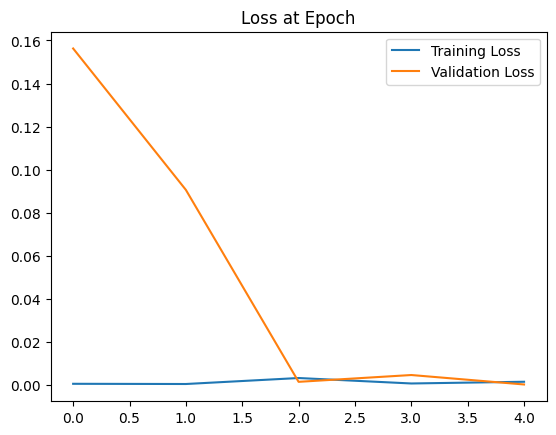

In [27]:
#Graph CNN results
#Graph the loss at each epoch

#we have to convert train_losses to python lists so that we can plot the graphs
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses,label="Training Loss")
plt.plot(test_losses,label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

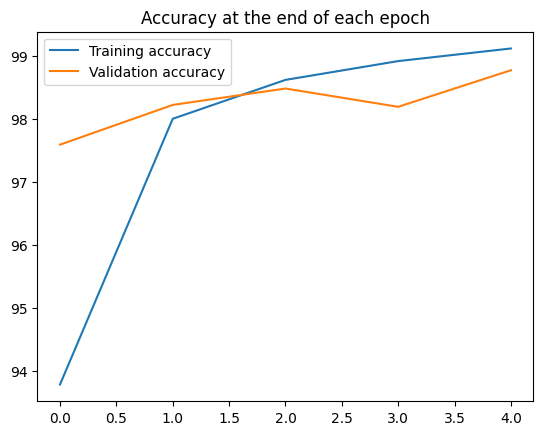

In [28]:
#Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct],label = "Training accuracy")
plt.plot([t/100 for t in test_correct],label = "Validation accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [29]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle = False)

In [30]:
with torch.no_grad():
  correct = 0
  for X_test,y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct+= (predicted == y_test).sum()

In [31]:
#Check for correctness
correct.item()

#Our model got 9877 / 10000 correct

9877

In [32]:
#Running a new image through our CNN
#We can pick an image

test_data[4143] #tensor with an image in it and it's number at the end

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [33]:
#We then need the data without the label at the end so we can see if our prediction is correct
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

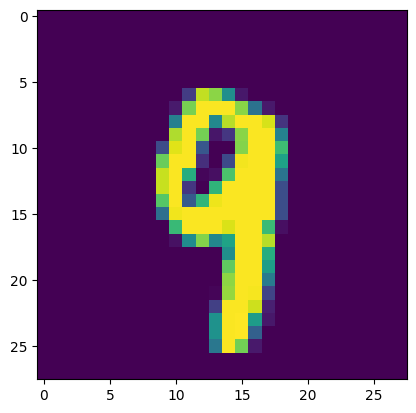

In [36]:
#show the image
plt.imshow(test_data[4143][0].reshape(28,28))

#we can see it's a 9

In [37]:
#Pass the image through the model to see the output of our prediction
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) #batch size,color channel,28x28 image


In [39]:
new_prediction.argmax()

#we can see it's a 9

tensor(9)